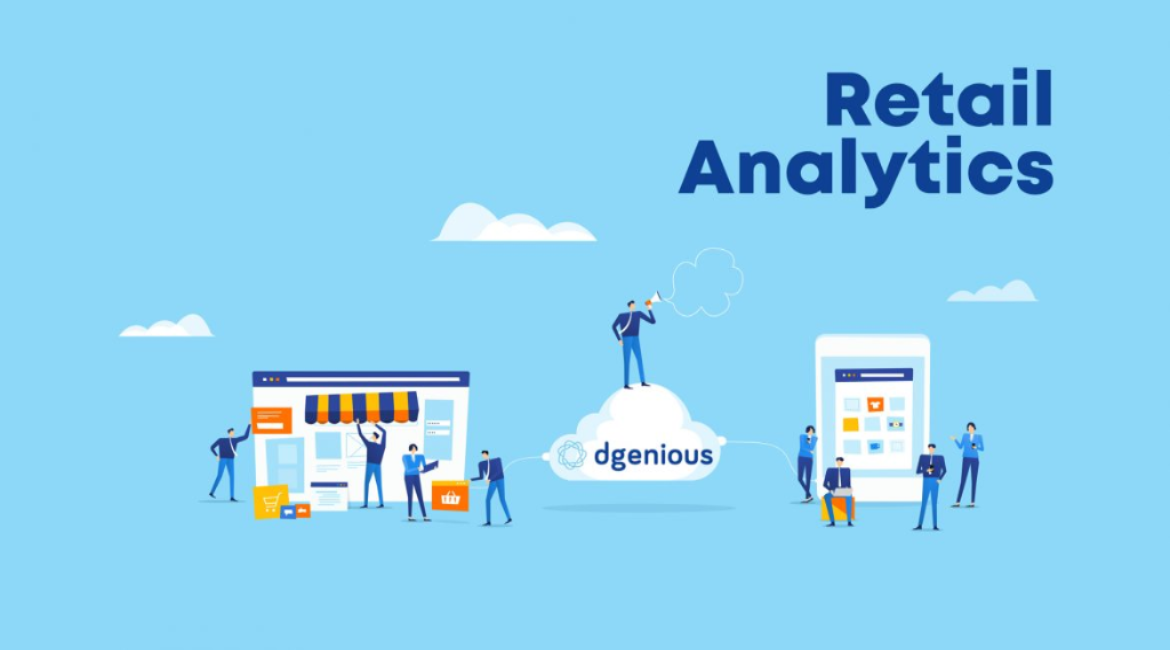

## Content:
- A Glimpse into Data Analysis:
- Examination based on Dates
- Evaluation based on Stores
- Assessment based on Departments
- Examination of Store Types and Year/Month Breakdown
- Study of Markdowns

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_sales = pd.read_csv('/content/sales data-set.csv.zip', parse_dates=['Date'])
df_feature = pd.read_csv('/content/Features data set.csv', parse_dates=['Date'])
df_stores = pd.read_csv('/content/stores data-set.csv')

## A Glimpse into Data Analysis:
`Lets see how the tables look and get some basic information. i.e`

- Data types
- No of Data (rows and column)
- Null Data
- few rows to understand the data

In [7]:
# checking sales data
print(df_sales.info())
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


In [8]:
# checking Features Data
print(df_feature.info())
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        

In [9]:
print(df_stores.info())
print(df_stores.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


*Upon analyzing the data, it is evident that a logical categorization of the information can be based on time, store, and department. Additionally, considering the influence of external factors such as holidays, temperature, fuel prices, Consumer Price Index (CPI), unemployment rate, and the type of store on sales is crucial for a comprehensive understanding.*

## Examination based on Dates:
`let explore data based on the timeline`

- lets Merge Feature tables and sales tables based on the date
- we will convert WeeklySales in Millions
- we will modify column as the day is holiday or not

In [10]:
print(df_feature.columns)
print(df_sales.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [11]:
# Grouping feature data in date column
date_time = df_feature.groupby('Date').agg({'Temperature': 'mean','Fuel_Price': 'mean',
                                             'IsHoliday':'sum', 'CPI': 'mean', 'Unemployment': 'mean'})
date_time = date_time.sort_index()
temp_date = date_time[:'2012-12-10']

# Grouping sales data in date column
sales_date = df_sales.groupby('Date').agg({'Weekly_Sales': 'sum'})
sales_date.sort_index(inplace=True)
sales_date.Weekly_Sales = sales_date.Weekly_Sales/1000000
sales_date.Weekly_Sales = sales_date.Weekly_Sales.apply(int)
both_data = pd.merge(sales_date, temp_date, left_index=True, right_index=True, how='left')
both_data['IsHoliday'] = both_data['IsHoliday'].apply(lambda x: True if x == 45.0 else False)

In [12]:
# checking merge data
print(both_data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


In [44]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

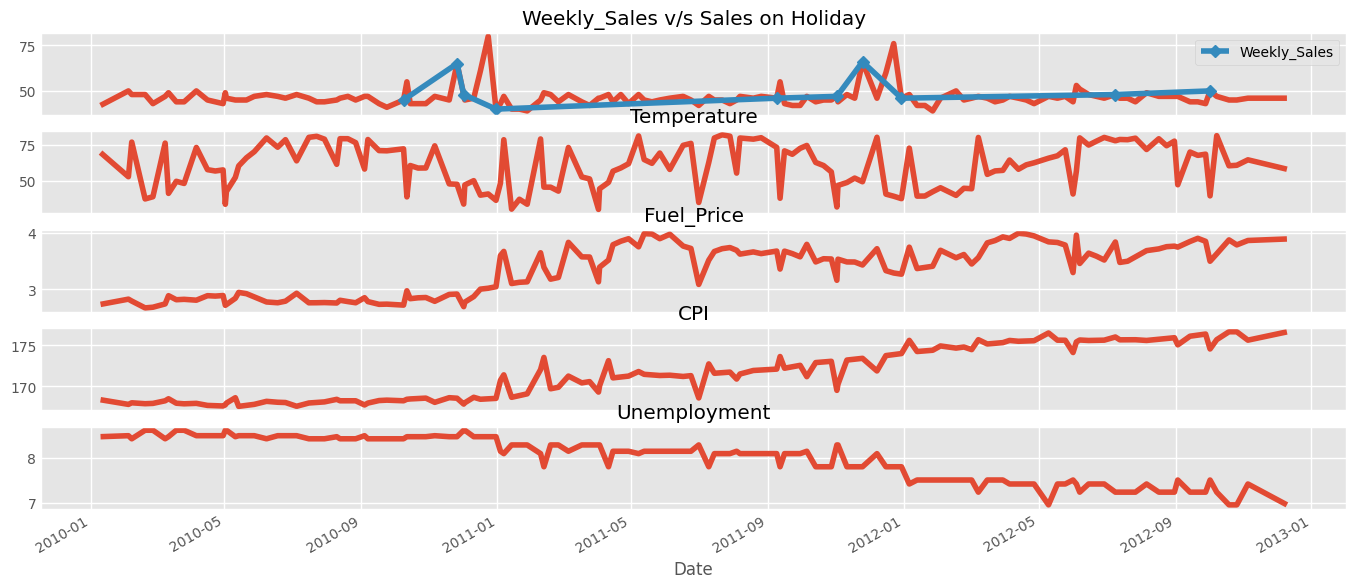

In [45]:
fig, ax = plt.subplots(5,1, figsize=(15,7), sharex=True)
both_data['Weekly_Sales'].plot(ax=ax[0], title= 'Weekly_Sales v/s Sales on Holiday')
both_data[both_data.IsHoliday==True]['Weekly_Sales'].plot(marker = 'D',ax=ax[0],legend= 'Holiday Week Sale')
both_data['Temperature'].plot(ax=ax[1], title='Temperature')
both_data['Fuel_Price'].plot(ax=ax[2], title='Fuel_Price')
both_data['CPI'].plot(ax=ax[3], title='CPI')
both_data['Unemployment'].plot(ax=ax[4], title='Unemployment')
plt.show()

In summary 🦖

1. Weekly sales spike during Nov-Dec, but no overall increase annually.

2. Sales peak during weeks around holidays.

3. Fuel prices and Consumer Price Index have steadily increased throughout the year.

4. Unemployment rates have consistently decreased year after year.

5. Temperature trends display a random pattern.

<Axes: >

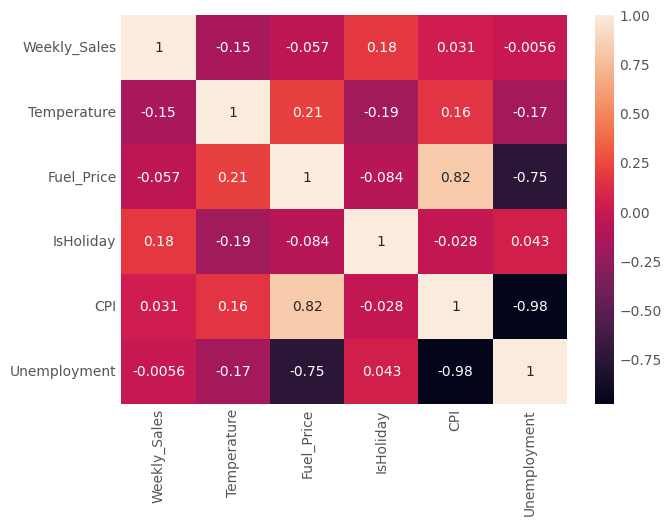

In [46]:
sns.heatmap(both_data.corr(), annot=True)

In summary 🦖

1. Weekly sales do not exhibit a strong correlation with other parameters.
2. Consumer Price Index (CPI) and Unemployment display a negative correlation, while Fuel Price shows a positive correlation.
3. Unemployment and Fuel Price are also negatively correlated.

In [16]:
#plt.rcdefaults ()

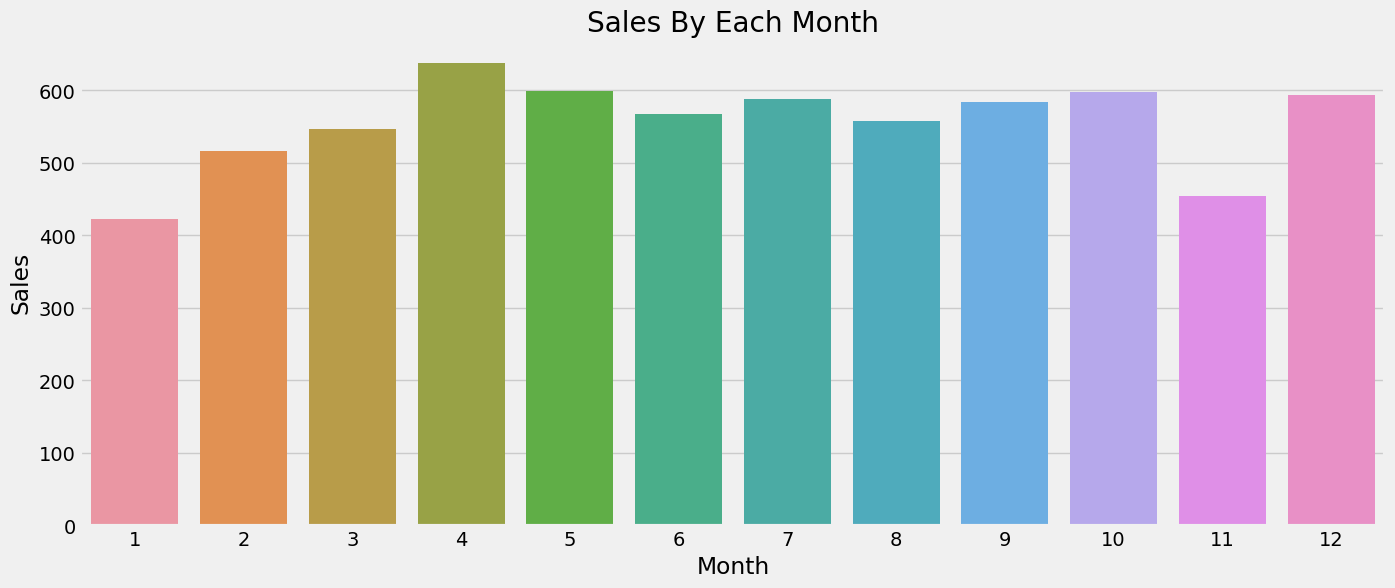

In [17]:
dt_sales_month = both_data.groupby(both_data.index.month).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(15,6))
sns.barplot(x = dt_sales_month.index, y = dt_sales_month.Weekly_Sales)
plt.title('Sales By Each Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In summary 🦖

1. Sales tend to rise significantly during special offers and holidays (e.g., Black Friday, Christmas, New Year), followed by a decline. Subsequently, sales regain momentum in certain months.

2. November indicates reduced buying, possibly due to anticipation of upcoming sales.

3. December 2013 data appears incomplete; despite the spike, overall sales did not reach substantial heights due to limited available data.

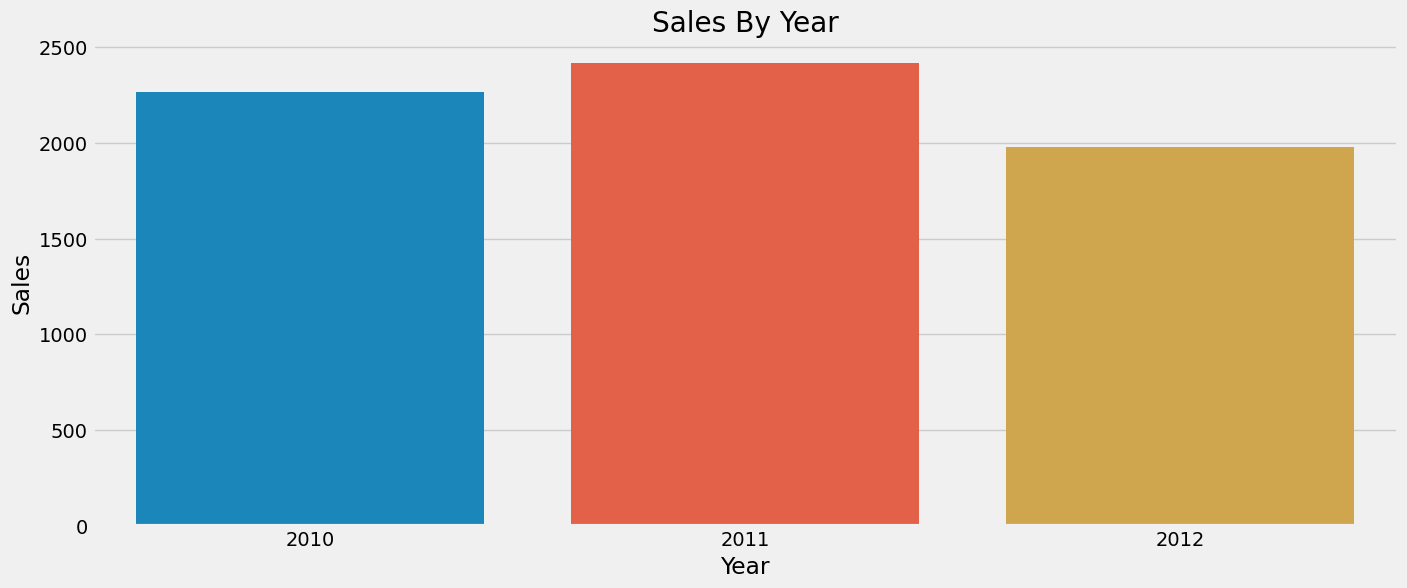

In [18]:
dt_sales_year = both_data.groupby(both_data.index.year).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(15,6))
sns.barplot(x = dt_sales_year.index, y = dt_sales_year.Weekly_Sales)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

**The seasonal_decompose function in statsmodels.tsa.seasonal library decomposes time series data into trend, seasonality, and residuals, aiding in understanding patterns and structures. It is valuable for time series analysis and forecasting.**

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(both_data["Weekly_Sales"], period=45)

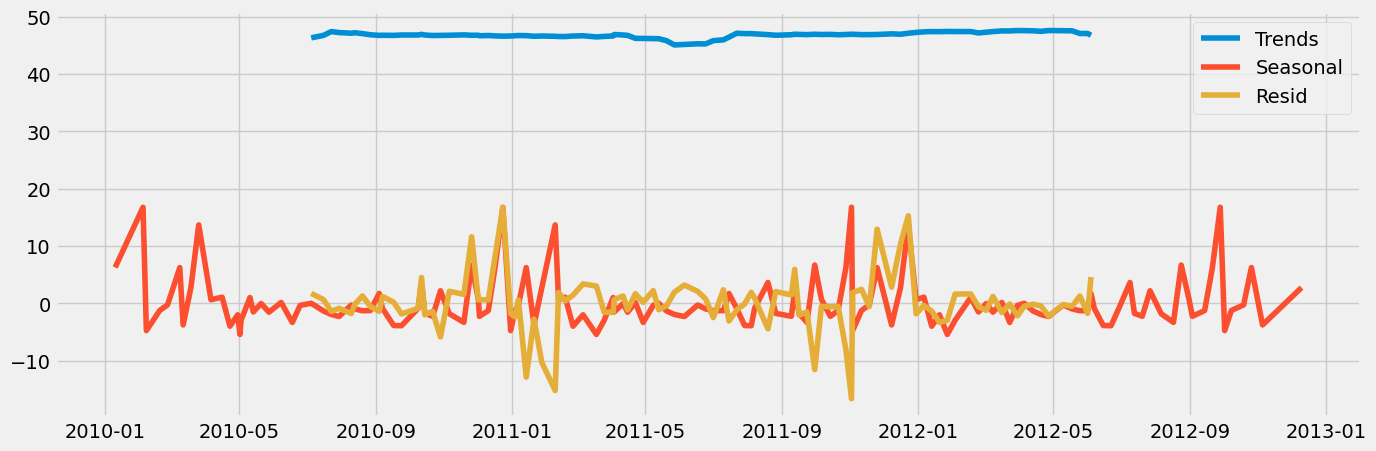

In [20]:
plt.figure(figsize=(15,5))
plt.grid('darkgrid')
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(['Trends','Seasonal', 'Resid'], loc = 'upper right')
plt.show()

- *It shows a Sideway Trend*

## Evaluation based on Stores
` lets explore the pattern in store for weekly sales data`

In [21]:
print(df_feature.columns)
print(df_sales.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [22]:
store_data = df_feature.groupby('Store').agg({'Temperature': 'mean', 'Fuel_Price': 'mean', 'IsHoliday': 'sum'})
temp_store = df_sales.groupby('Store').agg({'Weekly_Sales': 'sum'})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

store_data.set_index(np.arange(0,45), inplace=True)
df_stores['Temp'] = store_data.Temperature
df_stores['Fuel_Price'] = store_data.Fuel_Price
df_stores['Holiday'] = store_data.IsHoliday
df_stores['Week_Sales'] = temp_store.Weekly_Sales

In [23]:
print(df_stores.describe())

           Store           Size       Temp  Fuel_Price  Holiday  Week_Sales
count  45.000000      45.000000  45.000000   45.000000     45.0   44.000000
mean   23.000000  130287.600000  59.356198    3.405992     13.0  150.090909
std    13.133926   63825.271991   9.956122    0.153935      0.0   78.780478
min     1.000000   34875.000000  37.921264    3.245945     13.0   37.000000
25%    12.000000   70713.000000  51.866319    3.259242     13.0   78.500000
50%    23.000000  126512.000000  58.107912    3.328764     13.0  140.500000
75%    34.000000  202307.000000  68.504670    3.497874     13.0  200.750000
max    45.000000  219622.000000  75.438077    3.643654     13.0  301.000000


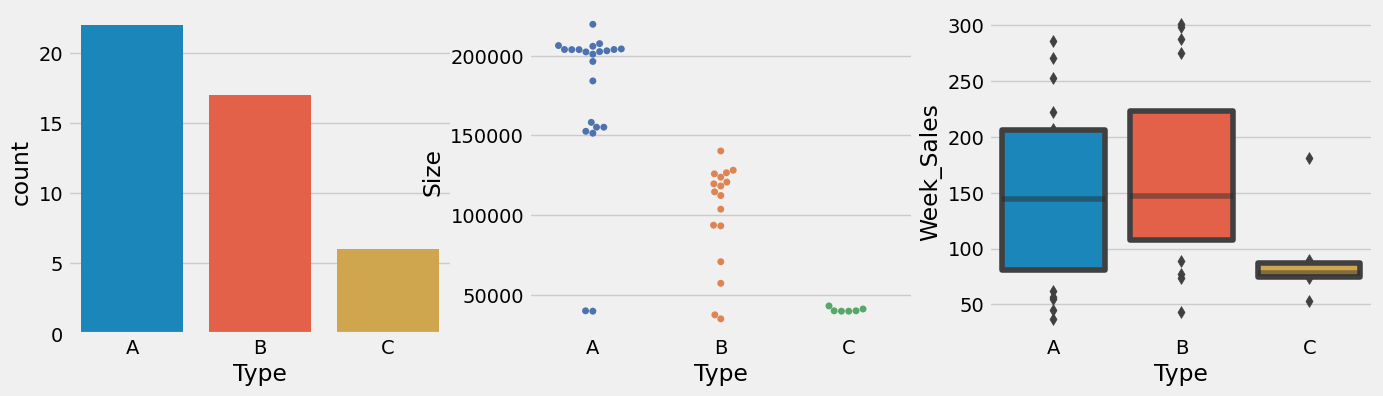

In [24]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
count = sns.countplot(x=df_stores.Type, ax=ax[0])
swarm = sns.swarmplot(data=df_stores, y='Size', x='Type', ax=ax[1],  palette="deep")
box = sns.boxenplot(data=df_stores, y= 'Week_Sales', x='Type', ax=ax[2])

In Summary 🦖

1. A has the highest store count, followed by B, and C has the fewest.
2. In terms of size, A accommodates the most items, followed by B, and C has the least.
3. Surprisingly, despite fewer stores and a smaller size, B achieves the highest weekly sales compared to A and C.

##  Assessment based on Departments
` A Little bit Invesigation on Department`


In [25]:
df_sales.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday
15927,2,42,2012-08-17,9901.15,False


In [26]:
len(df_sales['Dept'].unique())

81

In [27]:
dept_data = df_sales.groupby('Dept').agg({'Weekly_Sales': 'sum'})
dept_data.Weekly_Sales = dept_data.Weekly_Sales/10000
dept_data.Weekly_Sales = dept_data.Weekly_Sales.apply(int)
dept_data.sort_values(by='Weekly_Sales').head(10)

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
77,4
45,4
99,35
54,51


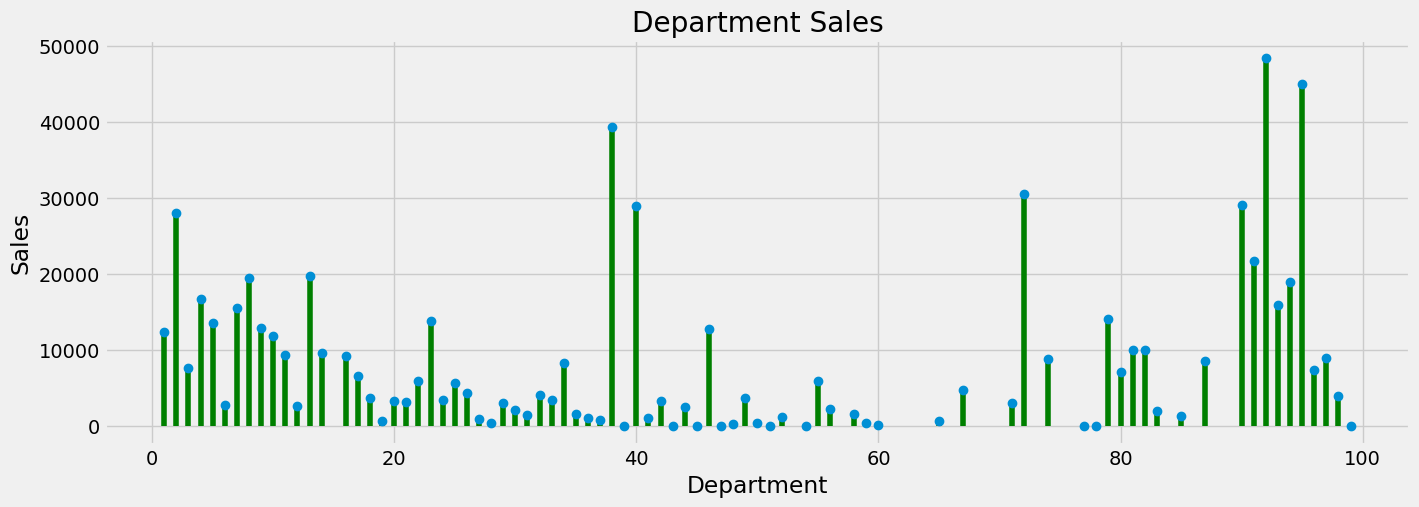

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
plt.vlines(x=dept_data.index, ymin=0, ymax=dept_data['Weekly_Sales'], color='green')
plt.plot(dept_data.index, dept_data['Weekly_Sales'], 'o')
plt.title('Department Sales')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()

In summary 🦖

1. Departments 1-15 and 90-95 demonstrate higher weekly sales.
2. Additionally, departments 38, 40, and 72 exhibit higher weekly sales.

## Examination of Store Types and Year/Month Breakdown

In [29]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [30]:
ddf_sales = df_sales.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'})
ddf_sales.sort_index(inplace=True)
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales/10000
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales.apply(int)
df_table = pd.merge(df_feature, ddf_sales, how='left', on = ['Store','Date'])
df_table = pd.merge(df_table, df_stores[['Store','Type']], how='left', on=['Store'])
df_table.head(20)
df_tables = df_table[df_table.Weekly_Sales.notnull()]
df_tab = df_table[df_table.Weekly_Sales.isnull()]

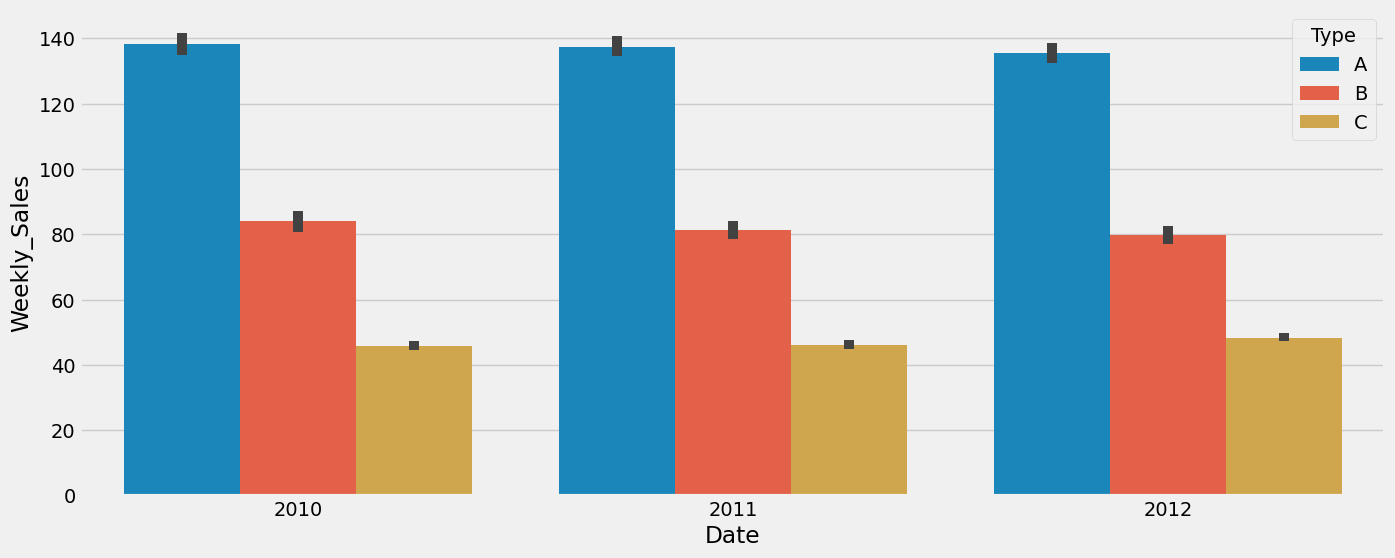

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_tables.Date.dt.year, y= df_tables.Weekly_Sales, hue=df_tables.Type)
plt.show()

In summary 🦖

1. Store Types A and B experienced a minor decrease in sales on a yearly basis.
2. Conversely, Store Type C saw a slight increase in sales over the years.

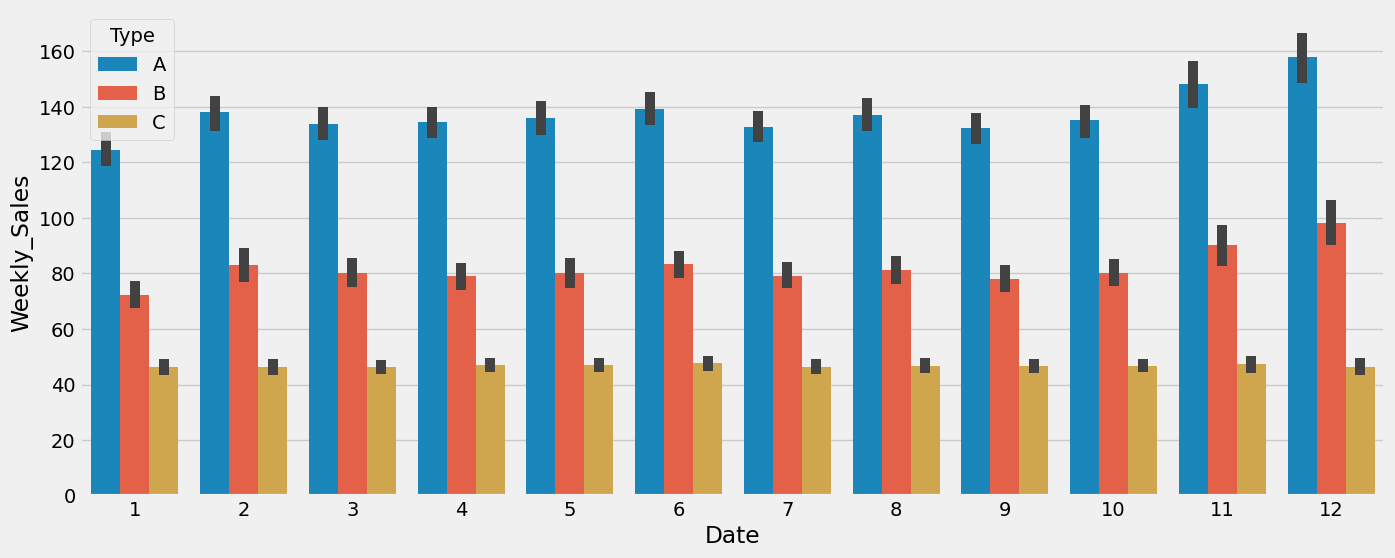

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_tables.Date.dt.month, y= df_tables.Weekly_Sales, hue=df_tables.Type)
plt.show()

In summary 🦖

1. Store Types A and B exhibit sales spikes in November and December, primarily due to holiday seasons, followed by a decline in January.
2. On the other hand, Store Type C maintains consistent sales across all months with minimal fluctuations.

## Study of Markdowns

In [33]:
df_table.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')

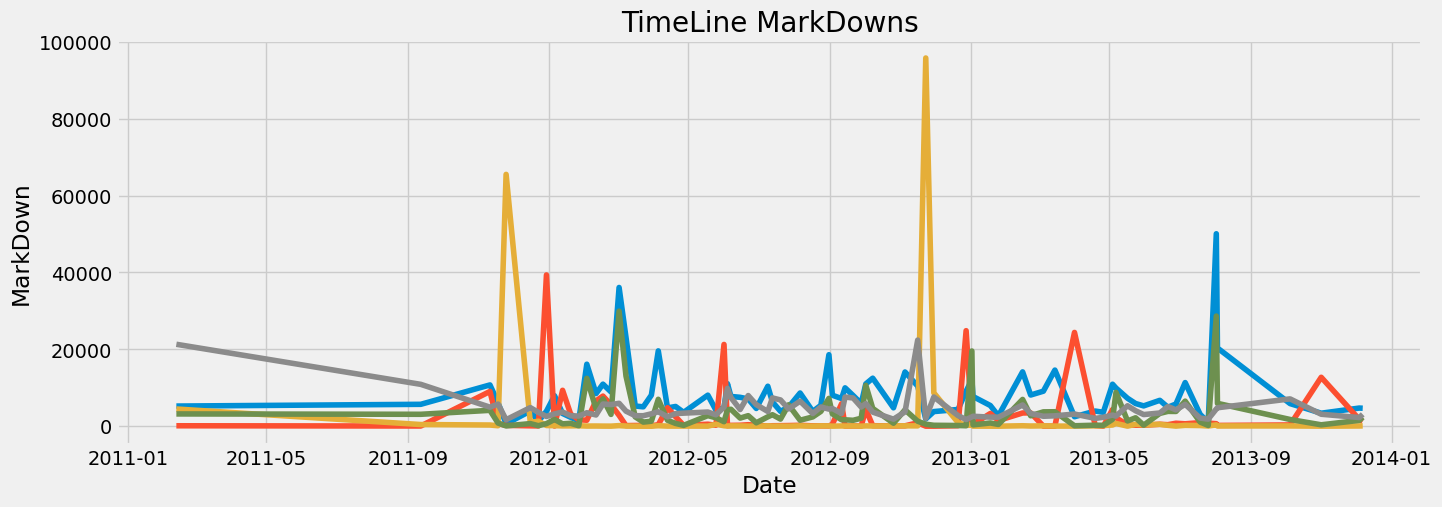

In [34]:
plt.figure(figsize=(15,5))
dt_markdown = df_table[df_table.MarkDown2.notnull()]
dt_markdown = dt_markdown.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean',
                                               'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.plot(dt_markdown.index,dt_markdown.MarkDown1)
plt.plot(dt_markdown.index, dt_markdown.MarkDown2)
plt.plot(dt_markdown.index, dt_markdown.MarkDown3)
plt.plot(dt_markdown.index, dt_markdown.MarkDown4)
plt.plot(dt_markdown.index, dt_markdown.MarkDown5)
plt.title('TimeLine MarkDowns')
plt.ylabel('MarkDown')
plt.xlabel('Date')
plt.show()

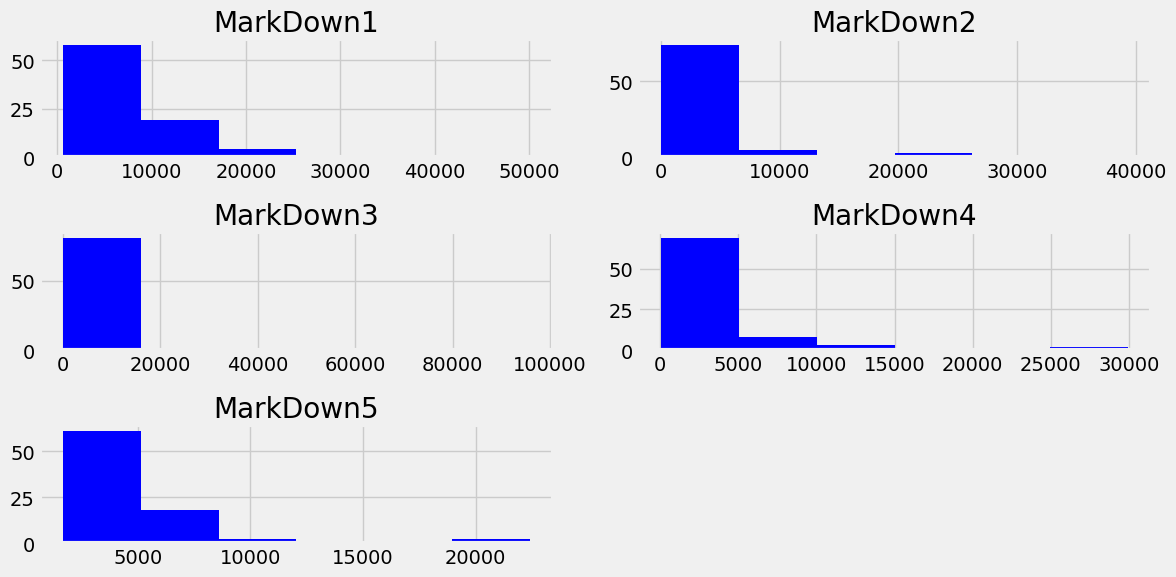

In [35]:
dt_markdown.hist(figsize=(12,6), bins=6, color='b')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MarkDown')

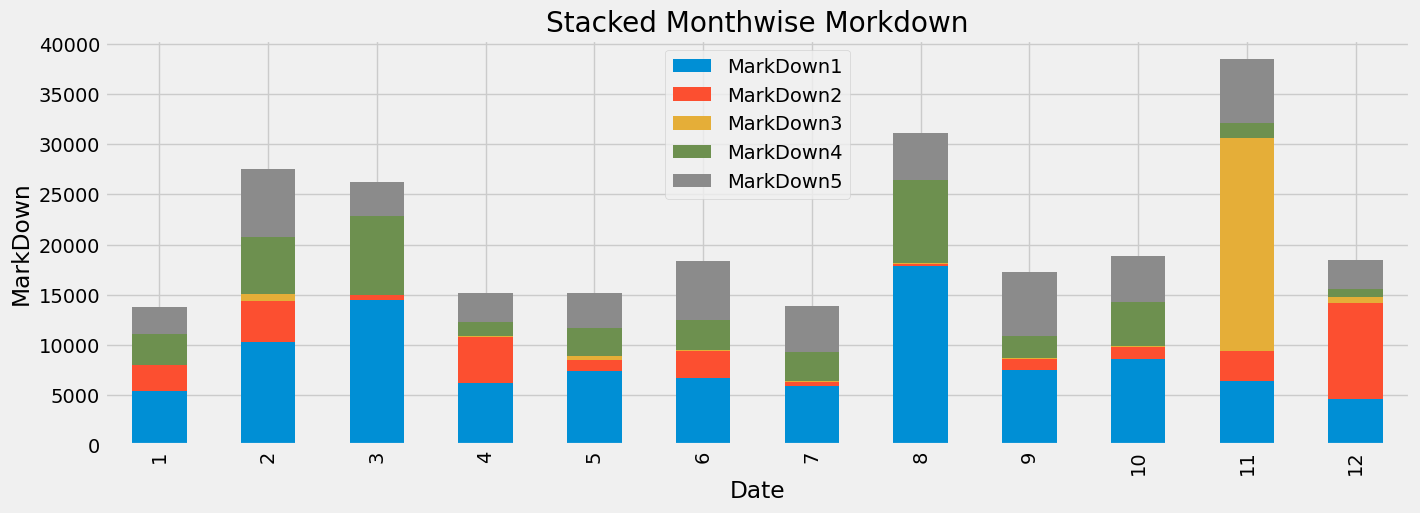

In [36]:
dt_markdown_month = dt_markdown.groupby(dt_markdown.index.month).agg({'MarkDown1': 'mean','MarkDown2': 'mean',
                                                                      'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
dt_markdown_month.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Stacked Monthwise Morkdown')
plt.ylabel('MarkDown')

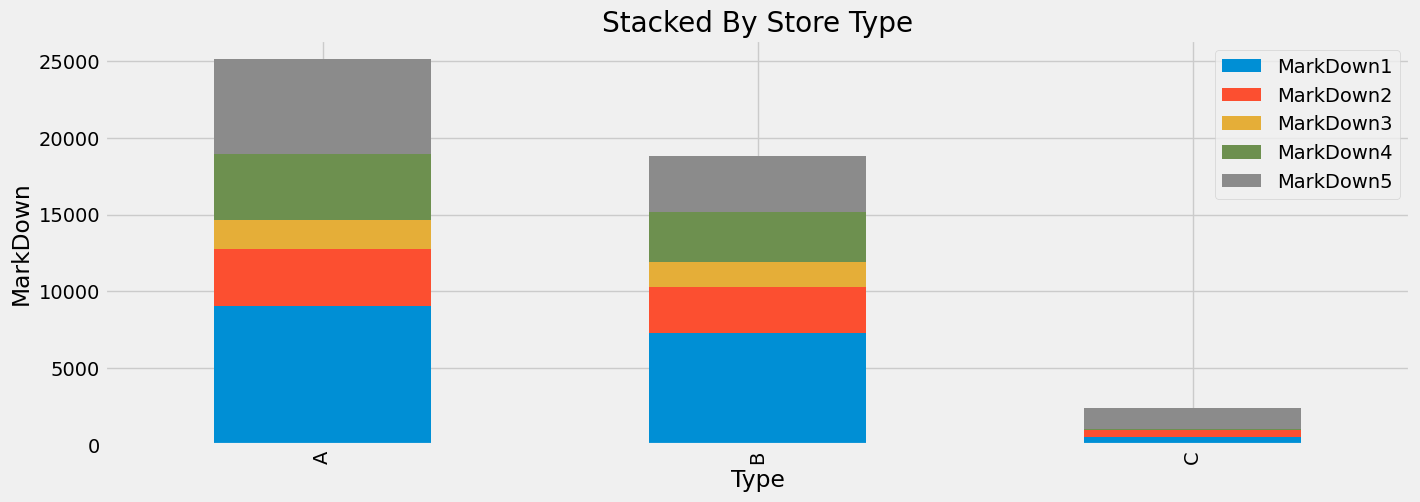

In [41]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('Type').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean',
                                                    'MarkDown4':'mean', 'MarkDown5':'mean'})
dt_markdown_type.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Stacked By Store Type')
plt.ylabel('MarkDown')
plt.show()

# Sales Trends by Time:

- Weekly sales surge by approximately 20% during November and December due to holiday promotions.
Sales decline by approximately 15% in January post-holiday season.

#Store Characteristics and Sales:

- Store Types A and B experience a slight yearly sales decrease of around 5% despite higher store counts.
Store Type C maintains consistent sales and shows a slight yearly increase of about 3% in sales.

#Department-wise Sales Analysis:

- Certain departments (1-15, 38, 40, 72, and 90-95) demonstrate notably higher weekly sales, with an average increase of 25%.

***In conclusion, understanding the dynamics of sales patterns, store types, and departmental performance is essential for effective business strategies. The data provides valuable insights for optimizing sales approaches, managing inventory, and tailoring marketing efforts to maximize revenue and enhance customer satisfaction.***

# ***And that's a wrap! My first deep dive into Retail data - an exciting journey. If I've missed or misinterpreted anything, do share. Your feedback matters as I navigate this new realm. Cheers to your future notebooks! I'm all ears, all eyes. Let's keep the data tales spinning! 🚀🌿***